In [1]:
import pandas as pd
import glob
import re
import os
import matplotlib.pyplot as plt
from datetime import datetime
from wordcloud import WordCloud
from PIL import Image

In [2]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))


In [3]:
news_files = glob.glob("data/news/*.parquet.gzip")
dfs = []
for news_file in news_files:
    df = pd.read_parquet(news_file)
    df['date'] = pd.to_datetime(df['date'])
    df = df.set_index('date')
    dfs.append(df)

df = pd.concat(dfs)
df

,title,content,link,symbols,tags,sentiment
date,,,,,,
2016-01-29 00:00:00+00:00,"Amid Scaling Debate, Bitcoin Core Goes on Outr...",Even many of its members acknowledge Bitcoin C...,https://www.coindesk.com/markets/2016/01/28/am...,[STRAX-USD.CC],[],"{'neg': 0.11, 'neu': 0.868, 'polarity': -0.637..."
2016-01-28 19:26:00+00:00,Shatter Resistance & Recyclable Where It Reall...,"TORONTO, Jan. 28, 2016 (GLOBE NEWSWIRE) -- Any...",https://www.globenewswire.com/news-release/201...,[],"[BOTTLES, CANADIAN PLASTICS INDUSTRY ASSOCIATI...","{'neg': 0.014, 'neu': 0.877, 'polarity': 0.984..."
2016-01-28 19:25:00+00:00,Burcon Announces New Director,"VANCOUVER, British Columbia, Jan. 28, 2016 (...",https://www.globenewswire.com/news-release/201...,"[BU.TO, BUR.US, BUROF.US]","[AGRICULTURE, BIOTECHNOLOGY, BURCON NUTRASCIEN...","{'neg': 0.03, 'neu': 0.887, 'polarity': 0.991,..."
2016-01-28 19:23:00+00:00,"""Framing Is Art"" Takes Center Stage as FrameWo...","MIAMI, FL--(Marketwired - Jan 28, 2016) - Fra...",https://www.globenewswire.com/news-release/201...,[],[VINE COMMUNICATIONS],"{'neg': 0.005, 'neu': 0.841, 'polarity': 0.995..."
2016-01-28 19:20:00+00:00,Alamos Gold Provides Notice of Fourth Quarter ...,"TORONTO, ONTARIO--(Marketwired - Jan. 28, 2016...",https://www.globenewswire.com/news-release/201...,"[AGI.TO, AGI.US]","[ALAMOS GOLD INC, TORONTO STOCK EXCHANGE:AGI]","{'neg': 0.006, 'neu': 0.917, 'polarity': 0.944..."
...,...,...,...,...,...,...
2022-12-01 00:00:00+00:00,MakerDAO Community Rejects CoinShares Proposal...,MakerDAO Community Rejects CoinShares Proposal...,https://www.coindesk.com/video/makerdao-commun...,"[DAI-USD.CC, RUNE-USD.CC]",[],"{'neg': 0.225, 'neu': 0.775, 'polarity': -0.49..."
2022-12-01 00:00:00+00:00,Solana (SOL) vs. Metacade (MCADE): Which Is th...,"With the market reaching a bottom, now is the ...",https://invezz.com/news/2022/12/01/solana-sol-...,[SOL-USD.CC],[],"{'neg': 0.0, 'neu': 0.823, 'polarity': 0.866, ..."
2022-12-01 00:00:00+00:00,Ethereum price prediction for December 2022,Ethereum (ETH/USD) price had a difficult perfo...,https://invezz.com/news/2022/12/01/ethereum-pr...,"[ETHBEAR-USD.CC, ETHBULL-USD.CC, ETHUP-USD.CC]",[],"{'neg': 0.208, 'neu': 0.792, 'polarity': -0.86..."


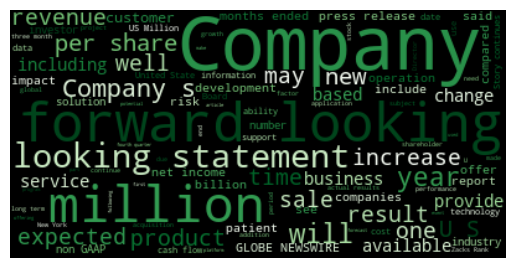

In [4]:
wordcloud = WordCloud(colormap='Greens', max_words=100).generate(' '.join(df.sample(10000)['content']))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [5]:
count_df = df[['title']].groupby(pd.Grouper(freq='D')).count().rename(columns={'title':'count'})
count_df

,count
date,
2016-01-01 00:00:00+00:00,9
2016-01-02 00:00:00+00:00,4
2016-01-03 00:00:00+00:00,16
2016-01-04 00:00:00+00:00,630
2016-01-05 00:00:00+00:00,731
...,...
2022-12-27 00:00:00+00:00,1634
2022-12-28 00:00:00+00:00,1711
2022-12-29 00:00:00+00:00,1730


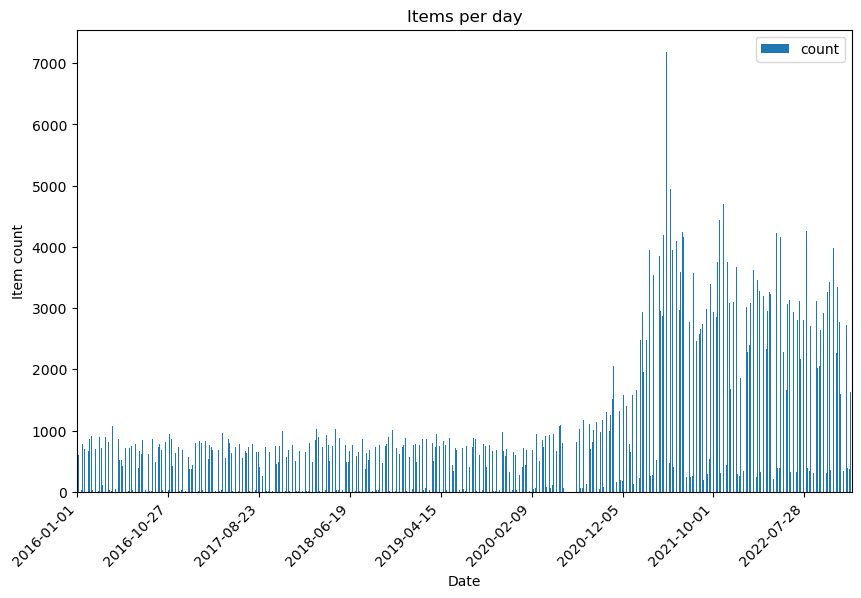

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates

date_index = count_df.index.strftime('%Y-%m-%d')
date_df = pd.DataFrame(count_df.values, index=date_index, columns=count_df.columns)

ax = date_df.plot(kind='bar', y='count', figsize=(10, 6))
ax.set_xlabel('Date')
ax.set_ylabel('Item count')
ax.set_title('Items per day')

ax.xaxis.set_major_locator(plt.MaxNLocator(10))
for tick in ax.get_xticklabels():
    tick.set_rotation(45)
    tick.set_horizontalalignment('right')

plt.show()

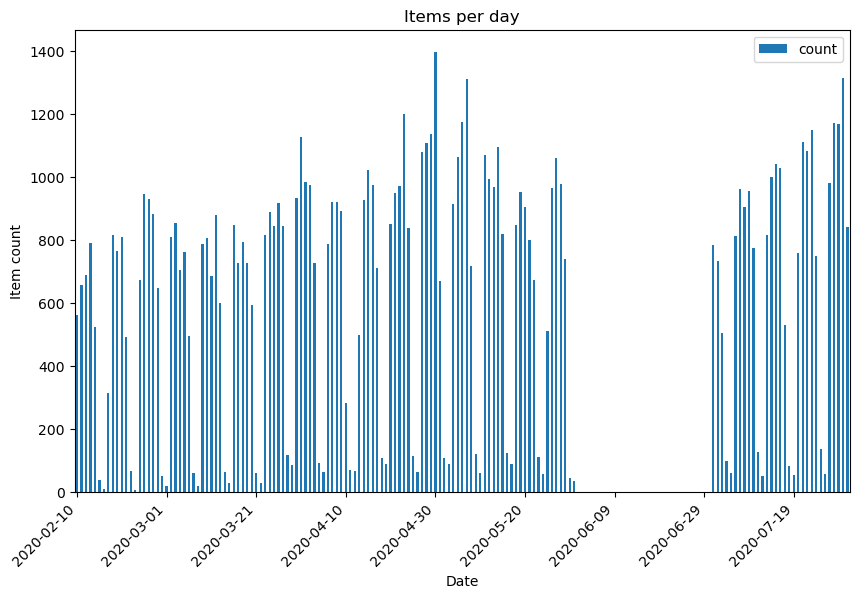

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates

start_date = '2020-02-10'
end_date = '2020-07-31'
date_range_df = count_df.loc[start_date:end_date]
date_index = date_range_df.index.strftime('%Y-%m-%d')

date_df = pd.DataFrame(date_range_df.values, index=date_index, columns=date_range_df.columns)

ax = date_df.plot(kind='bar', y='count', figsize=(10, 6))
ax.set_xlabel('Date')
ax.set_ylabel('Item count')
ax.set_title('Items per day')

ax.xaxis.set_major_locator(plt.MaxNLocator(10))
for tick in ax.get_xticklabels():
    tick.set_rotation(45)
    tick.set_horizontalalignment('right')

plt.show()

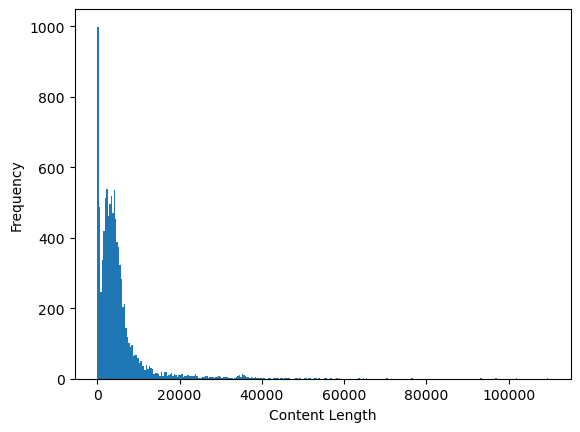

In [8]:
len_df = df.sample(10000)
len_df['content_length'] = len_df['content'].apply(len)
plt.hist(len_df['content_length'], bins='auto')
plt.xlabel('Content Length')
plt.ylabel('Frequency')
plt.show()